# **Download do dataset**

In [1]:
!wget https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/beans_dataset.tar.gz

--2023-07-26 12:34:33--  https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/beans_dataset.tar.gz
Resolving dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)... 52.217.43.140, 3.5.27.112, 52.217.37.92, ...
Connecting to dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)|52.217.43.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 179790562 (171M) [application/x-gzip]
Saving to: ‘beans_dataset.tar.gz’

beans_dataset.tar.g 100%[===================>] 171.46M  12.7MB/s    in 15s     

2023-07-26 12:34:49 (11.5 MB/s) - ‘beans_dataset.tar.gz’ saved [179790562/179790562]



Descompactando dataset

In [2]:
import tarfile

def extract_tar_gz(file_path, output_path):
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=output_path)

extract_tar_gz('/content/beans_dataset.tar.gz', '/content')

# **Criando variáveis**

In [ ]:
import tensorflow as tf

train_set = tf.keras.utils.image_dataset_from_directory(
        directory='/content/beans/train',
        labels='inferred',
        label_mode='int',
        batch_size=128,
        image_size=(500, 500),
        shuffle=False)

Found 1034 files belonging to 3 classes.


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
        directory='/content/beans/test',
        labels='inferred',
        label_mode='int',
        batch_size=128,
        image_size=(500, 500),
        shuffle=False)

Found 128 files belonging to 3 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
        directory='/content/beans/validation',
        labels='inferred',
        label_mode='int',
        batch_size=128,
        image_size=(500, 500),
        shuffle=False)

Found 133 files belonging to 3 classes.


# **Métodos do dataset**

Armazendo um item do dataset

In [ ]:
train_set_elem = train_set.take(1)

Imprimeindo suas labels

In [ ]:
labels_shape = []
for images, labels in train_set_elem:
    labels_shape = labels
print(labels_shape)

tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(128,), dtype=int32)


In [ ]:
images_shape = []
for images, labels in train_set_elem:
    images_shape = labels.shape
print(images_shape)

(128,)


Imprimindo shape

In [ ]:
#teste próprio
validation_set_elem = validation_set.take(1)
for images, labels in validation_set_elem :
    print(labels)

tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2], shape=(128,), dtype=int32)


# **Cor**

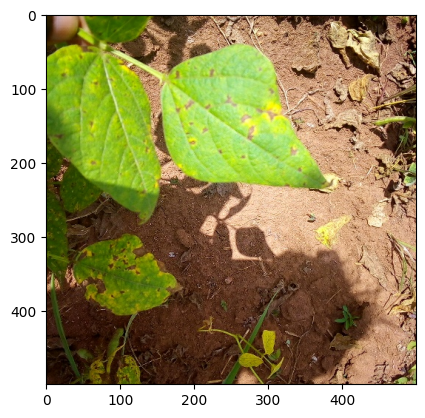

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images_batch, labels_batch = next(iter(train_set.take(1)))
images_np = images_batch.numpy()
normalized_image = images_np / 255.0

image_to_show = normalized_image[0]

plt.imshow(image_to_show)
plt.show()

# **Convolucional**

In [ ]:
image = np.array([[1, 1, 0, 0, 0, 0, 1, 1],
                  [1, 0, 1, 1, 1, 1, 0, 1],
                  [1, 0, 1, 1, 1, 1, 0, 1],
                  [1, 0, 0, 0, 0, 0, 0, 1],
                  [1, 0, 0, 0, 0, 0, 0, 1],
                  [1, 0, 1, 1, 1, 1, 0, 1],
                  [1, 0, 1, 1, 1, 1, 0, 1],
                  [1, 1, 0, 0, 0, 0, 1, 1]])

kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

In [ ]:
output_shape = (image.shape[0] - kernel.shape[0] + 1, image.shape[1] - kernel.shape[1] + 1)
conv_output = np.zeros(output_shape, dtype=int)

In [ ]:
for i in range(output_shape[0]):
    for j in range(output_shape[1]):
        neighborhood = image[i:i + kernel.shape[0], j:j + kernel.shape[1]]
        conv_output[i, j] = np.sum(neighborhood * kernel)

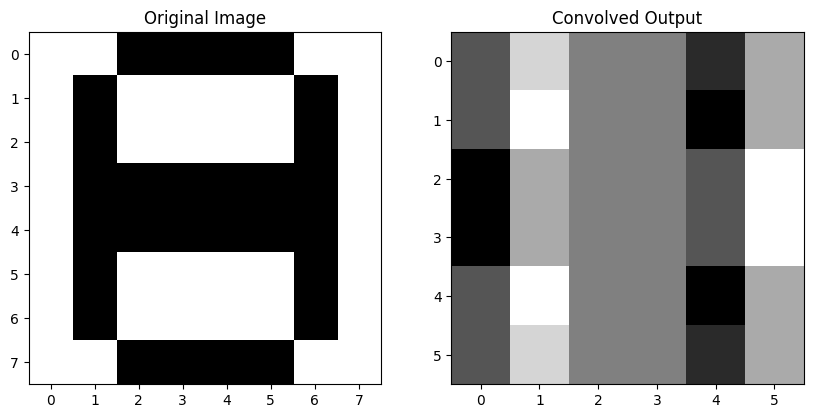

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(conv_output, cmap='gray')
plt.title('Convolved Output')
plt.show()

# **Camada convolucional teste**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

In [ ]:
model = Sequential()
model.add(Conv2D(filters=10, kernel_size=(5, 5), activation='relu', padding='same', strides=2, input_shape=(500, 500, 3)))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 250, 250, 10)      1480      
                                                                 
Total params: 1,480
Trainable params: 1,480
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 124, 124, 10)      760       
                                                                 
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 250, 250, 10)      760       
                                                                 
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 124, 124, 10)      760       
                                                                 
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________


# **Camada convolucional**

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [4]:
model = Sequential()
model.add(Conv2D(filters=3, kernel_size=(3, 3), activation='relu', padding='same', strides=2, input_shape=(500, 500, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=3, activation='softmax'))

In [5]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/beans/test',
    image_size=(500, 500),
    batch_size=32,
    shuffle=False
)
test_set = test_set.map(lambda x, y: (x, tf.one_hot(y, depth=3)))

train_set = tf.keras.utils.image_dataset_from_directory(
    directory='/content/beans/train',
    image_size=(500, 500),
    batch_size=32,
    shuffle=False
)
train_set = train_set.map(lambda x, y: (x, tf.one_hot(y, depth=3)))

Found 128 files belonging to 3 classes.
Found 1034 files belonging to 3 classes.


In [6]:
opt = Adam(learning_rate=0.001)
loss = CategoricalCrossentropy(from_logits=False)
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [7]:
model.fit(train_set, epochs=10)

Epoch 1/10
33/33 [==============================] - 16s 157ms/step - loss: 407.7602 - accuracy: 0.4149
Epoch 2/10
33/33 [==============================] - 6s 169ms/step - loss: 48.9011 - accuracy: 0.3395
Epoch 3/10
33/33 [==============================] - 6s 166ms/step - loss: 10.1776 - accuracy: 0.4516
Epoch 4/10
33/33 [==============================] - 5s 137ms/step - loss: 3.5074 - accuracy: 0.5803
Epoch 5/10
33/33 [==============================] - 6s 171ms/step - loss: 1.4227 - accuracy: 0.7186
Epoch 6/10
33/33 [==============================] - 5s 138ms/step - loss: 0.9785 - accuracy: 0.7756
Epoch 7/10
33/33 [==============================] - 6s 171ms/step - loss: 0.7397 - accuracy: 0.8075
Epoch 8/10
33/33 [==============================] - 5s 138ms/step - loss: 0.5944 - accuracy: 0.8317
Epoch 9/10
33/33 [==============================] - 5s 141ms/step - loss: 0.4885 - accuracy: 0.8511
Epoch 10/10
33/33 [==============================] - 5s 153ms/step - loss: 0.4003 - accuracy: 0

In [8]:
test_loss, test_acc = model.evaluate(test_set)

4/4 [==============================] - 1s 136ms/step - loss: 3.4215 - accuracy: 0.4297


In [9]:
print("Test set accuracy:", test_acc)
print("Test set loss:", test_loss)

Test set accuracy: 0.4296875
Test set loss: 3.4215290546417236
